In [1]:
import numpy as np
import pandas as pd
root='C:\\Users\\MUH0351\\Instacart Market Basket Analysis\\'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

C:\Users\MUH0351\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_df = pd.read_pickle(root + 'train_df.pkl')

In [3]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [4]:
train_df=reduce_memory(train_df)

Memory usage of properties dataframe is : 17074.43039703369  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  4516.063112258911  MB
This is  26.44927536231884 % of the initial size


In [5]:
train_df.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,user_product_orders,user_product_reorders,...,department_1,department_2,department_3,department_4,total_orders_by_department,total_reorders_by_department,reorder_ratio_by_department,add_to_cart_ratio_by_department,add_to_cart_std_by_department,total_unique_customers_by_department
0,1,1,2,8,0.0,196,1,0,10,9,...,0,0,1,1,2690129,1757892,0.65332,6.976562,6.710938,172795
1,1,2,3,7,15.0,196,1,1,10,9,...,0,0,1,1,2690129,1757892,0.65332,6.976562,6.710938,172795
2,1,3,3,12,21.0,196,1,1,10,9,...,0,0,1,1,2690129,1757892,0.65332,6.976562,6.710938,172795
3,1,4,4,7,29.0,196,1,1,10,9,...,0,0,1,1,2690129,1757892,0.65332,6.976562,6.710938,172795
4,1,5,4,15,28.0,196,1,1,10,9,...,0,0,1,1,2690129,1757892,0.65332,6.976562,6.710938,172795


In [6]:
train_df.drop(['user_id','product_id'], axis=1, inplace=True)

# Splitting the dataset

In [7]:
X= train_df[train_df.columns.drop('reordered')]
y=train_df['reordered']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

# Feature Scaling

In [9]:
feat_scale = MinMaxScaler()
X_train = feat_scale.fit_transform(X_train)
X_test= feat_scale.fit_transform(X_test)

# Buiding ANN Model:

In [10]:
ann = tf.keras.models.Sequential()

In [11]:
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
ann.fit(X_train, y_train, batch_size=400, epochs= 20)

Epoch 1/20
54328/54328 [==============================] - 93s 2ms/step - loss: 0.1927 - accuracy: 0.9132
Epoch 2/20
54328/54328 [==============================] - 91s 2ms/step - loss: 0.1695 - accuracy: 0.9209
Epoch 3/20
54328/54328 [==============================] - 95s 2ms/step - loss: 0.1664 - accuracy: 0.9224
Epoch 4/20
54328/54328 [==============================] - 89s 2ms/step - loss: 0.1643 - accuracy: 0.9232
Epoch 5/20
54328/54328 [==============================] - 89s 2ms/step - loss: 0.1631 - accuracy: 0.9236
Epoch 6/20
54328/54328 [==============================] - 90s 2ms/step - loss: 0.1624 - accuracy: 0.9239
Epoch 7/20
54328/54328 [==============================] - 90s 2ms/step - loss: 0.1618 - accuracy: 0.9243
Epoch 8/20
54328/54328 [==============================] - 91s 2ms/step - loss: 0.1614 - accuracy: 0.9244
Epoch 9/20
54328/54328 [==============================] - 95s 2ms/step - loss: 0.1610 - accuracy: 0.9246
Epoch 10/20
54328/54328 [==============================

In [13]:
probability= ann.predict(X_test)

334481/334481 [==============================] - 280s 838us/step


In [14]:
predictions = (probability>0.5)

Classification Report: 
                precision    recall  f1-score   support

           0       0.94      0.88      0.91   4391625
           1       0.92      0.96      0.94   6311757

    accuracy                           0.93  10703382
   macro avg       0.93      0.92      0.92  10703382
weighted avg       0.93      0.93      0.93  10703382

Accuracy Score:
 0.9258133550685195
F1 Score:  0.9385472932028592


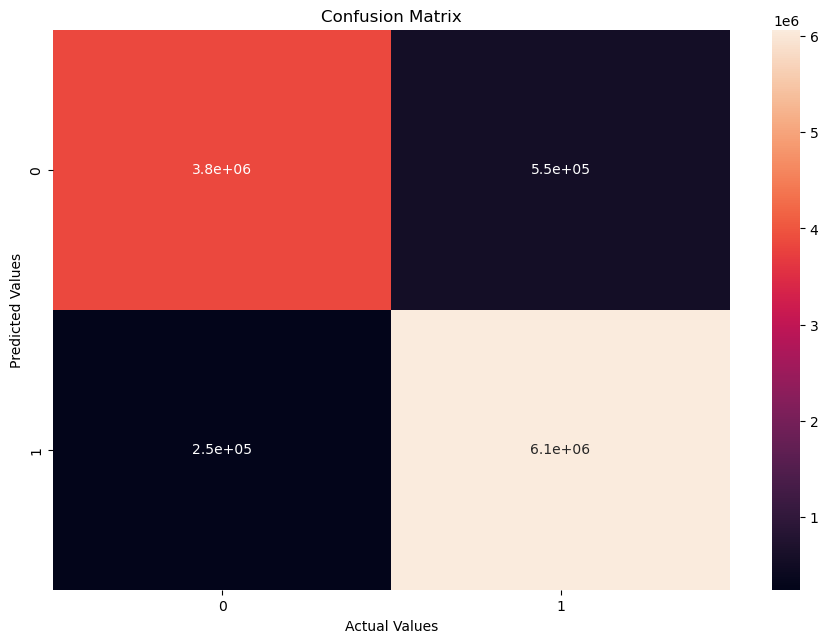

Area under curve :  0.9815214027135067 



In [16]:
print('Classification Report: \n ', classification_report(y_test, predictions))
print('Accuracy Score:\n', accuracy_score(y_test,predictions))

#f1 score
f1_scr = f1_score(y_test, predictions)
print('F1 Score: ',f1_scr)


#confusion matrix
con_mat = confusion_matrix(y_test,predictions)
plt.figure(figsize=(24,16))
plt.subplot(222)
sns.heatmap(con_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()




#roc_auc_score
model_roc_auc = roc_auc_score(y_test,probability) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probability)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
threshold = np.round(thresholds[ix],3)


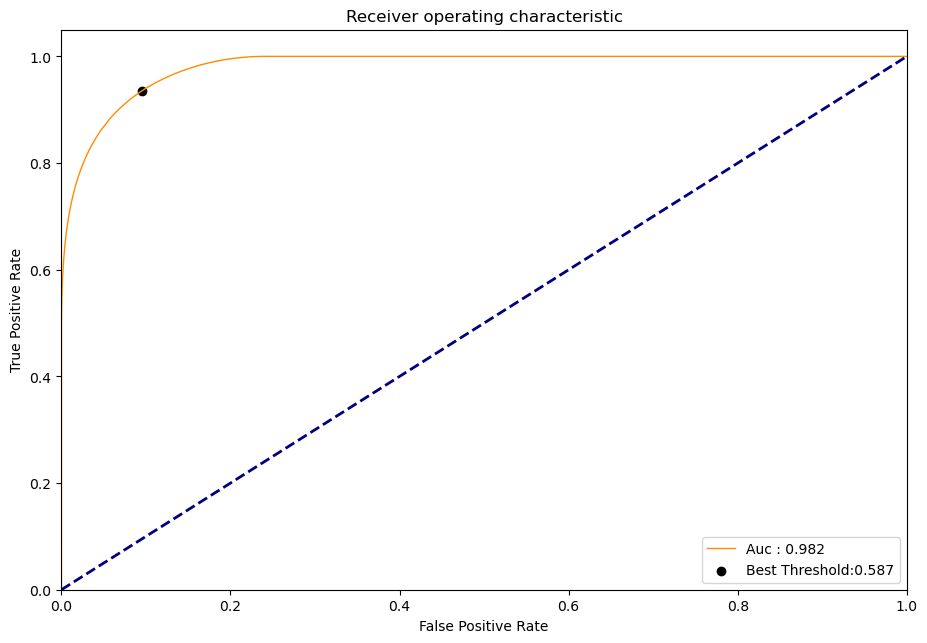

In [17]:
plt.figure(figsize=(24,16))
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()